In [1]:
#Importiere mehrere (Standard-)Packages
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy
from scipy import optimize


#um folgende Packages zu haben, muss man Sachen einfügen (siehe Durchschnittsphysiker-Ordner)
#Außerdem installieren:
#pip3 install antlr4-python3-runtime
from sympy import *
from __future__ import division
from process_latex import process_sympy

#Nils-Krams. unsicherheits_formel.py dazu vorher unter dem Ordner z.B. Benutzer/Tim/Anaconda3/lib/ gespeichert werden
from unsicherheits_formel import * 


#Zum genaueren betrachten der Grafiken:
#%matplotlib notebook
init_printing() # enable latex ausgabe

# Blatt 04

### Zunächst Funktionen Definieren

In [147]:
#Kuramoto-Gleichung
def kuramoto(t_n,theta,omega, r, phi, K=50):
    y = omega + K * r * np.sin(phi - theta)
    return y

In [177]:
#Runge-Kutta-Gleichung/Verfahren
def rk4_kuramoto(funktion,t_n,x_n,schrittbreite,omega, r, phi, K=50):
    #Funktion muss f(t,x) sein <- in dieser Reihenfolge!
    h = schrittbreite
    fkt1 = funktion
    
    #Faktoren berechnen
    k1 = fkt1(t_n,x_n,omega, r, phi, K)
    k2 = fkt1(t_n + h/2, x_n + h/2 * k1,omega, r, phi, K)
    k3 = fkt1(t_n + h/2, x_n + h/2 * k2,omega, r, phi, K)
    k4 = fkt1(t_n + h,x_n + h * k3,omega, r, phi, K)

    #neuen Wert berechnen
    t_neu = t_n + h
    x_neu = x_n + h/6 * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t_neu,x_neu

In [157]:
#Runge-Kutta-Gleichung/Verfahren
def rk4(funktion,x_n,t_n,schrittbreite):
    #Funktion muss f(t,x) sein <- in dieser Reihenfolge!
    h = schrittbreite

    fkt1 = funktion
    
    #Faktoren berechnen
    k1 = fkt1(t_n,x_n)
    k2 = fkt1(t_n + h/2, x_n + h/2 * k1)
    k3 = fkt1(t_n + h/2, x_n + h/2 * k2)
    k4 = fkt1(t_n + h,x_n + h * k3)

    #neuen Wert berechnen
    t_neu = t_n + h
    x_neu = x_n + h/6 * (k1 + 2 * k2 + 2 * k3 + k4)
    
    return t_neu, x_neu

In [154]:
#Ordnungsparameter bestimmen
def ordnung(N,theta):
    #bertrachte Imaginärteil und Realteil des Parameters gesondert
    tempRe = 0
    tempIm = 0
    
    #Schleife um Summe der Theta zu berechnen
    for i in range(0,N):
        tempRe = tempRe + np.cos(theta[i])
        tempIm = tempIm + np.sin(theta[i])
        
    #Normieren um Mittelwert zu bekommen:
    tempRe = tempRe / N
    tempIm = tempIm / N
    
    #r und Phi berechnen
    r = (tempIm**2 + tempRe**2)**(1/2)
    phi = np.arccos(tempRe)
    
    return r,phi

### Nun Startwerte definieren

In [203]:
#Feste Zahlen

#Anzahl der Oszillatoren
N = 50

#Koppungsstärke
K = 50

#Länge des Zeitintervalls
Nt = 150

#Schrittweite in der Zeit
dt = 0.01

#---------------------------

#Zufallsverteilungen generieren

#Phasen des Oszis
theta = np.array([0.0]*N)
theta = np.random.random(N)*2*np.pi

#Frequenzen der Oszis
omega = np.array([0.0]*N)
omega = np.random.standard_cauchy(N)

### Hauptzelle(n)

0.9941474917115578


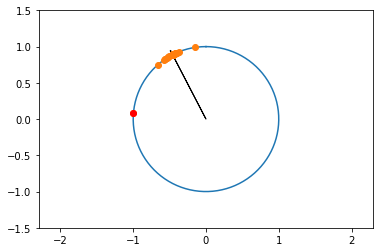

0.9881637984592637


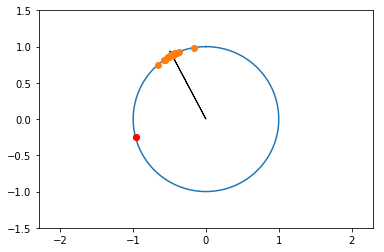

0.9821483871144399


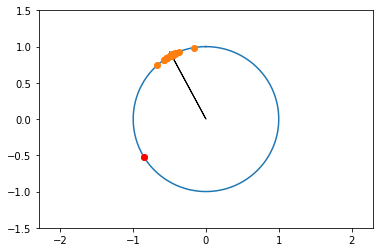

0.9762586425033075


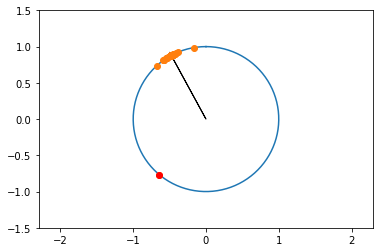

0.97018931982263


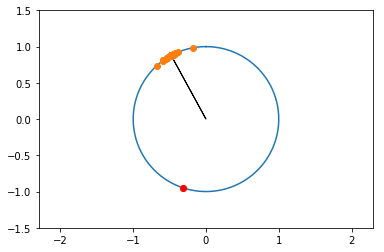

0.9637587517772005


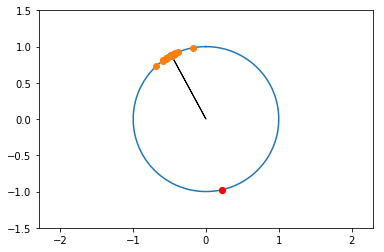

0.9581036941899717


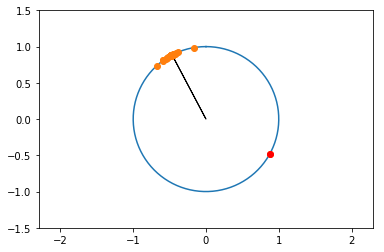

0.9605147197936208


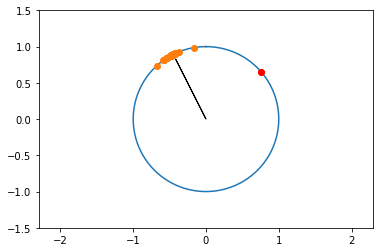

0.9817950899706686


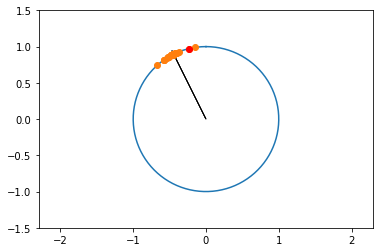

0.9967338097797925


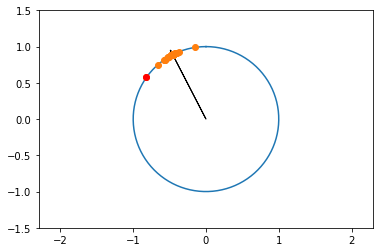

0.9951741295961055


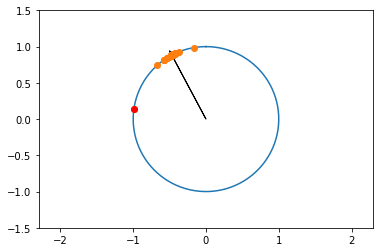

0.9893596101252249


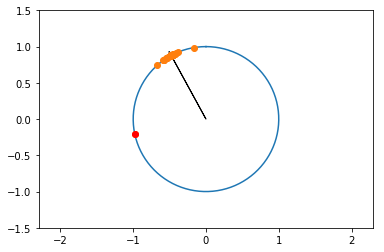

0.9833052032265599


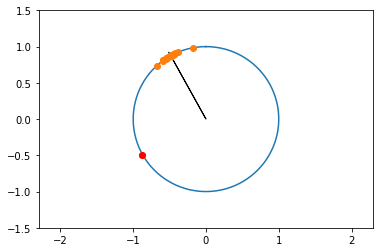

0.9774091841966156


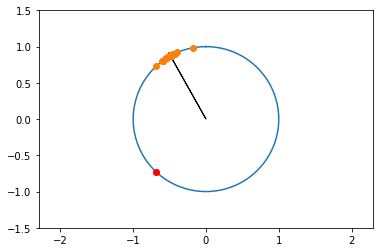

0.9713965628079114


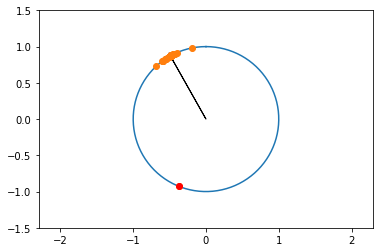

0.9650165043578186


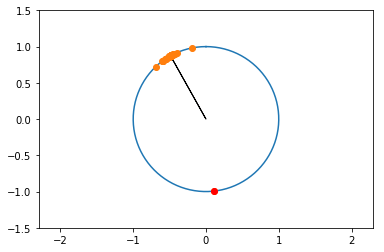

0.9589448038267521


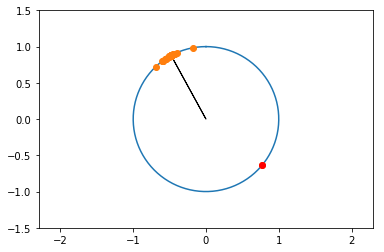

0.9587000550260024


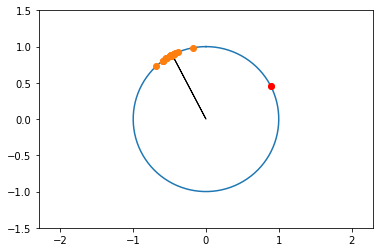

0.976938705052236


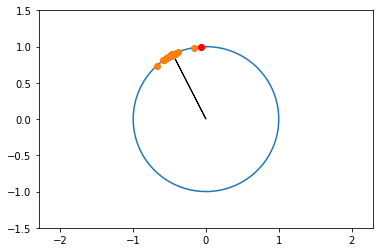

0.9955707991325417


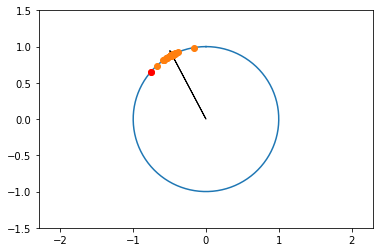

0.996058054561246


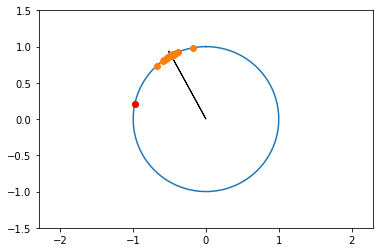

0.9905310560324184


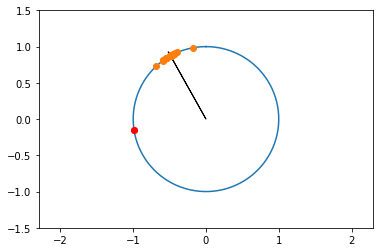

0.9844468160143488


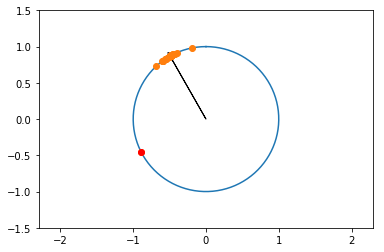

0.9785338062919483


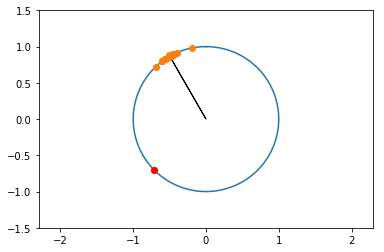

0.9725667408377894


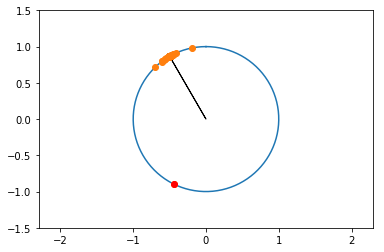

0.9662525155455541


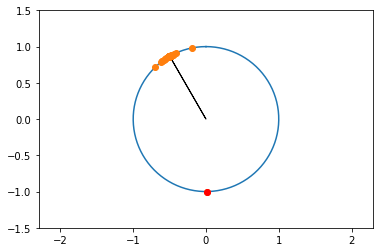

0.9599408345108028


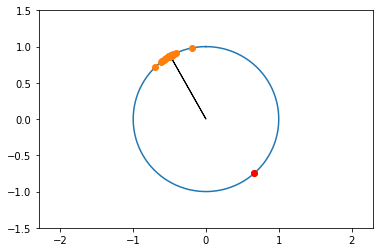

0.9576846649023661


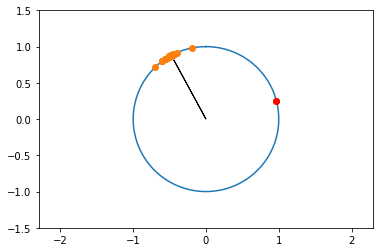

0.9721839531218085


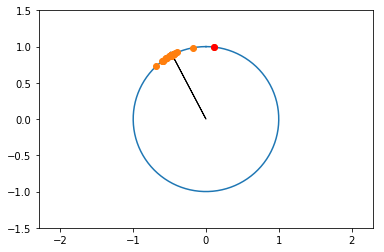

0.9936792475718718


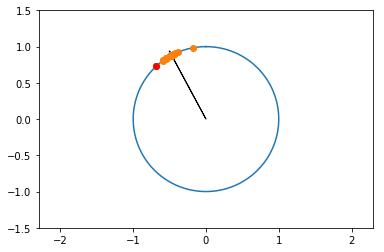

0.9967510100344303


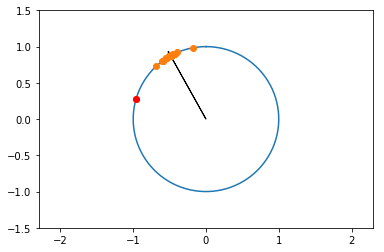

0.9916721934788212


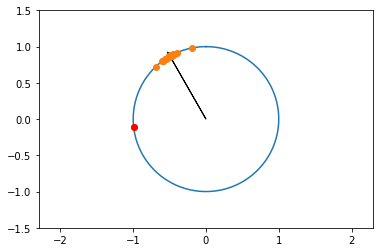

0.985576027249844


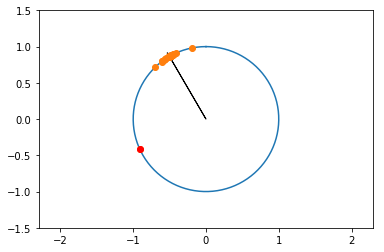

0.9796371695120029


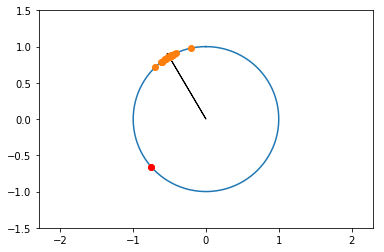

0.9737039435111542


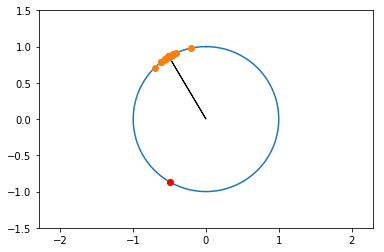

0.9674610249834632


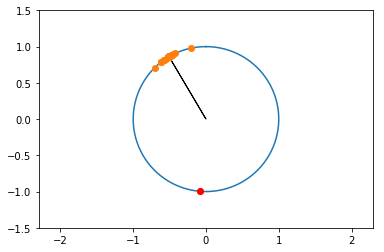

0.9610286638711693


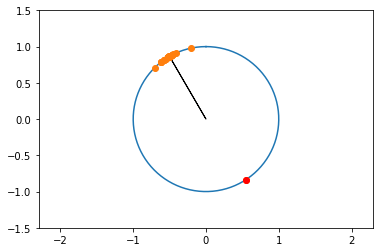

0.9573046349518355


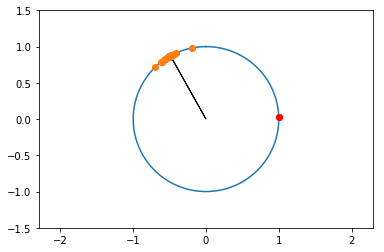

0.9678759224805394


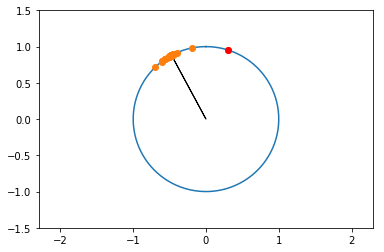

0.9910155950596244


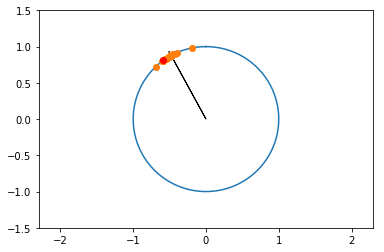

0.9971917404477558


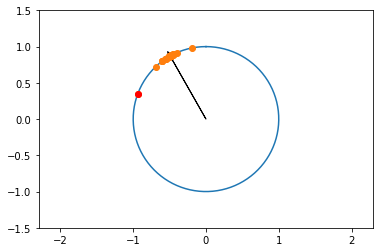

0.9927738043547203


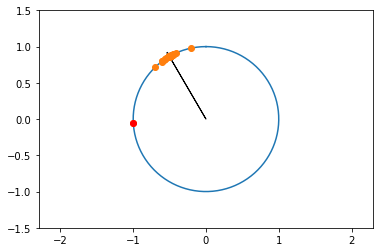

0.9866950322199695


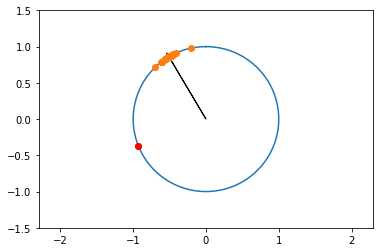

0.9807237715646965


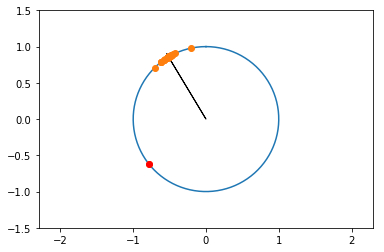

0.9748126440347816


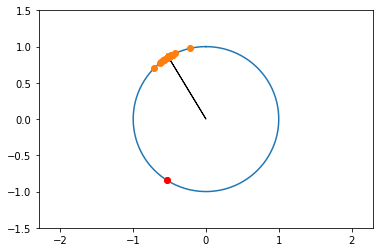

0.9686401707266078


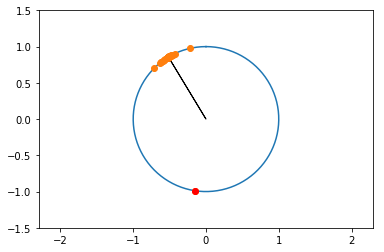

0.9621660721163474


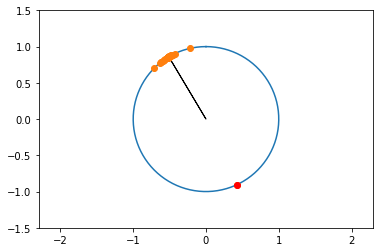

0.9574049478302705


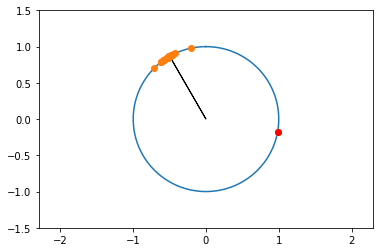

0.9642546077235059


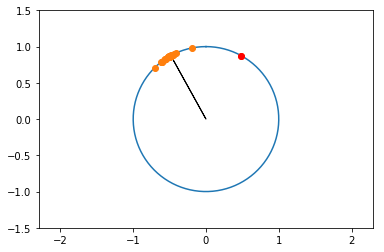

0.9876111719753624


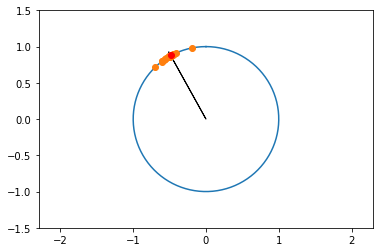

0.9973050632189728


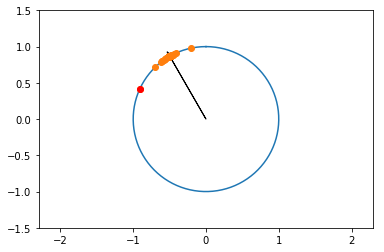

0.9938218691444448


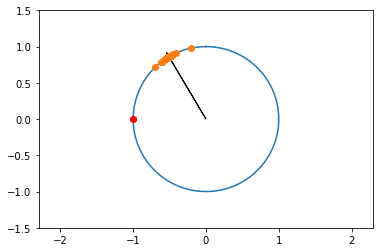

0.987804756466588


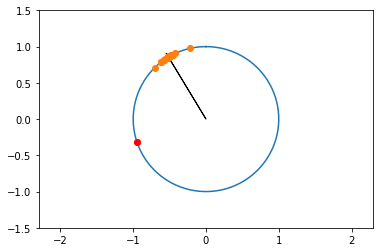

0.9817974451726508


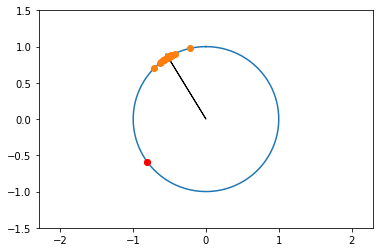

0.9758970126624855


SystemError: <built-in method write of _io.BufferedWriter object at 0x000000EC7FC957D8> returned a result with an error set

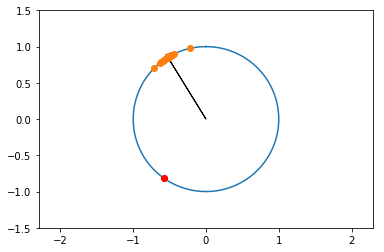

In [216]:
temp = 0


for i in range(0,Nt):
    #Ordnungsparameter berechnen
    r, phi = ordnung(N,theta)
    print(r)
    
    #Nun alle neuen theta-Werte berechnen
    for j in range(0,N):
        #Kuramoto-Gleichung in RK-einsetzen für Oszillator j
        temp, theta[j] = rk4_kuramoto(kuramoto,t_n=temp,x_n=theta[j],schrittbreite=dt,omega=omega[j],r=r,phi=phi,K=K)
     
    #Plotten
    plt.figure("phases")
    
    #Kreis plotten
    an = np.linspace(0,2*np.pi,100)
    plt.plot(np.sin(an),np.cos(an))
    
    plt.arrow(0,0,r*np.cos(phi),r*np.sin(phi),head_width=0.05)
    
    plt.plot(np.cos(theta),np.sin(theta),"o")
    plt.plot(np.cos(theta[38]),np.sin(theta[38]),"o", color="red")
    
    plt.xlim(-2.3,2.3)
    plt.ylim(-1.5,1.5)
    
    plt.draw()
    
    #Abspeichern der Daten
    fileName = "video/phases_b"+str(i)+".png"
    plt.savefig(fileName,dpi=200)
    plt.show(block=False)
    
    plt.pause(0.01)